<a href="https://colab.research.google.com/github/YOONINJAE/-_study/blob/master/5%EC%9D%BC%EC%B0%A8_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )


(56,)
(56,)


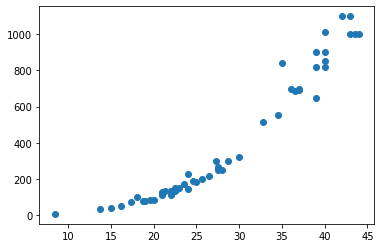

In [4]:
print(perch_length.shape)
print(perch_weight.shape)

plt.scatter(perch_length,perch_weight)
plt.show()

In [5]:
#머신러닝 패키지
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42

)

In [10]:
print(train_input.shape)
print(test_input.shape)

(42,)
(14,)


In [12]:
np.ndim(train_input) # 1차원인데 2차원으로 바꾸어야 함

1

In [15]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [16]:
train_input.shape
test_input.shape

(14, 1)

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(lr.intercept_, lr.coef_)

-709.0186449535477 [39.01714496]


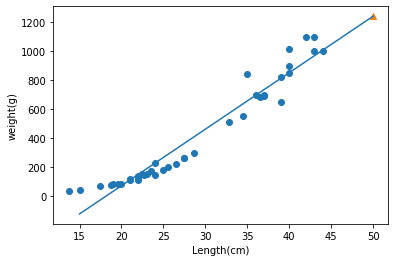

In [28]:
plt.scatter(train_input, train_target)

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_ + lr.intercept_])
plt.scatter(50,1241.8,marker = "^")
plt.xlabel('Length(cm)')
plt.ylabel('weight(g)')
plt.show()

In [29]:
lr.predict([[50]])

array([1241.83860323])

In [32]:
# isqure 값 모델을 94퍼센트 설명
print(lr.score(train_input,train_target)) 
# test 값
print(lr.score(test_input,test_target))

0.9398463339976039
0.8247503123313558


In [35]:
train_poly = np.column_stack((train_input**2, train_input))

train_poly[:10]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ]])

In [40]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

SyntaxError: ignored

In [41]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


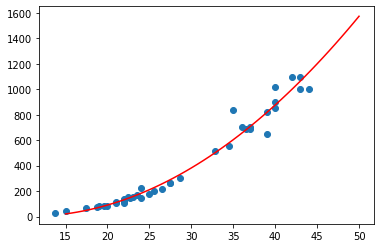

[15.         15.71428571 16.42857143 17.14285714 17.85714286 18.57142857
 19.28571429 20.         20.71428571 21.42857143 22.14285714 22.85714286
 23.57142857 24.28571429 25.         25.71428571 26.42857143 27.14285714
 27.85714286 28.57142857 29.28571429 30.         30.71428571 31.42857143
 32.14285714 32.85714286 33.57142857 34.28571429 35.         35.71428571
 36.42857143 37.14285714 37.85714286 38.57142857 39.28571429 40.
 40.71428571 41.42857143 42.14285714 42.85714286 43.57142857 44.28571429
 45.         45.71428571 46.42857143 47.14285714 47.85714286 48.57142857
 49.28571429 50.        ]


In [48]:
points = np.linspace(15, 50, 50)

plt.scatter(train_input, train_target)
plt.plot(points, 1.014*points**2 -21.55*points+116, color= 'r')
plt.show()
print(points)

In [51]:
print(lr.score(train_poly, train_target))
# print(lr.score(test_,test_target))

0.9706807451768623


ValueError: ignored